In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import tensorflow as tf
import copy, math

In [69]:
df = pd.read_csv("/Users/mohamadrezasalehi/Journey/Kaggle trainings/iris/iris.csv")

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [71]:
df.head(n = 10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [72]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [73]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [74]:
df["species"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [75]:
x = np.zeros(50)
y = np.zeros(50) + 1
z = np.zeros(50) + 2

In [76]:
target = np.concatenate((x, y, z), axis=0)

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

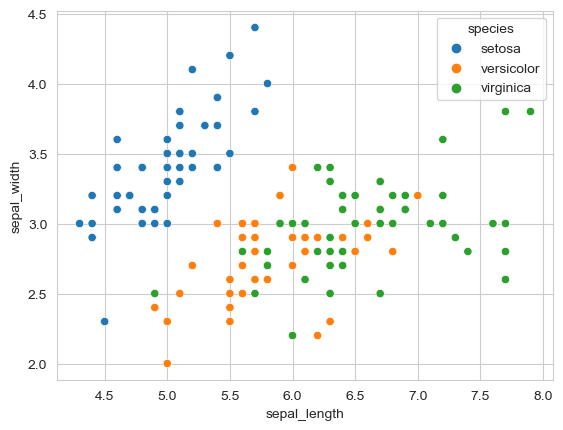

In [77]:
sns.scatterplot(data=df, x="sepal_length", y="sepal_width", hue="species")

<Axes: xlabel='sepal_length', ylabel='Count'>

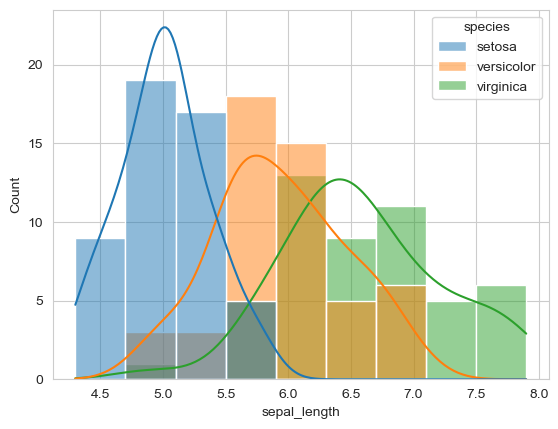

In [78]:
sns.histplot(data = df, x = "sepal_length", hue="species", kde=True)

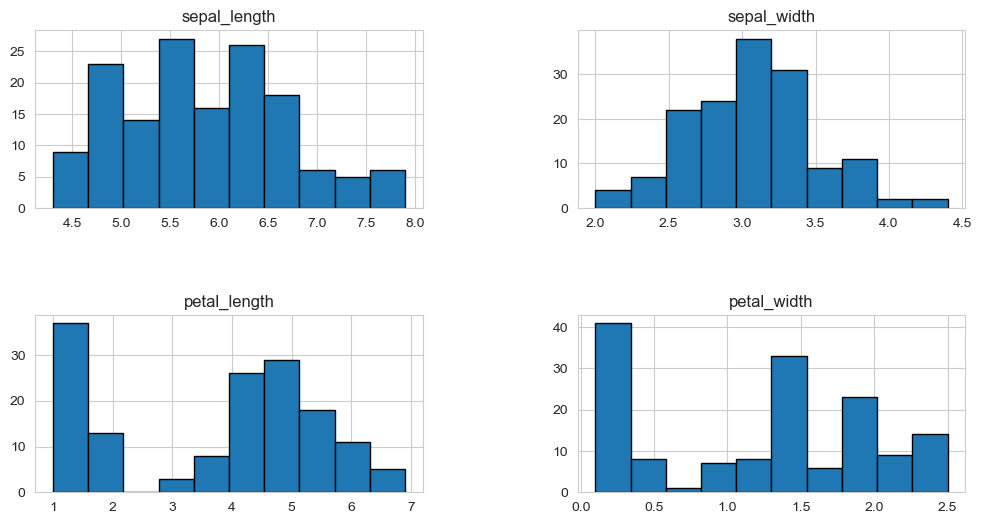

In [79]:
df[["sepal_length", "sepal_width", "petal_length", "petal_width" ]].hist(edgecolor='black', linewidth=1, figsize=(12, 6))

# Adjust the space between subplots (left, right, bottom, top)
plt.subplots_adjust(wspace=0.4, hspace=0.6)

# Show the plot
plt.show()

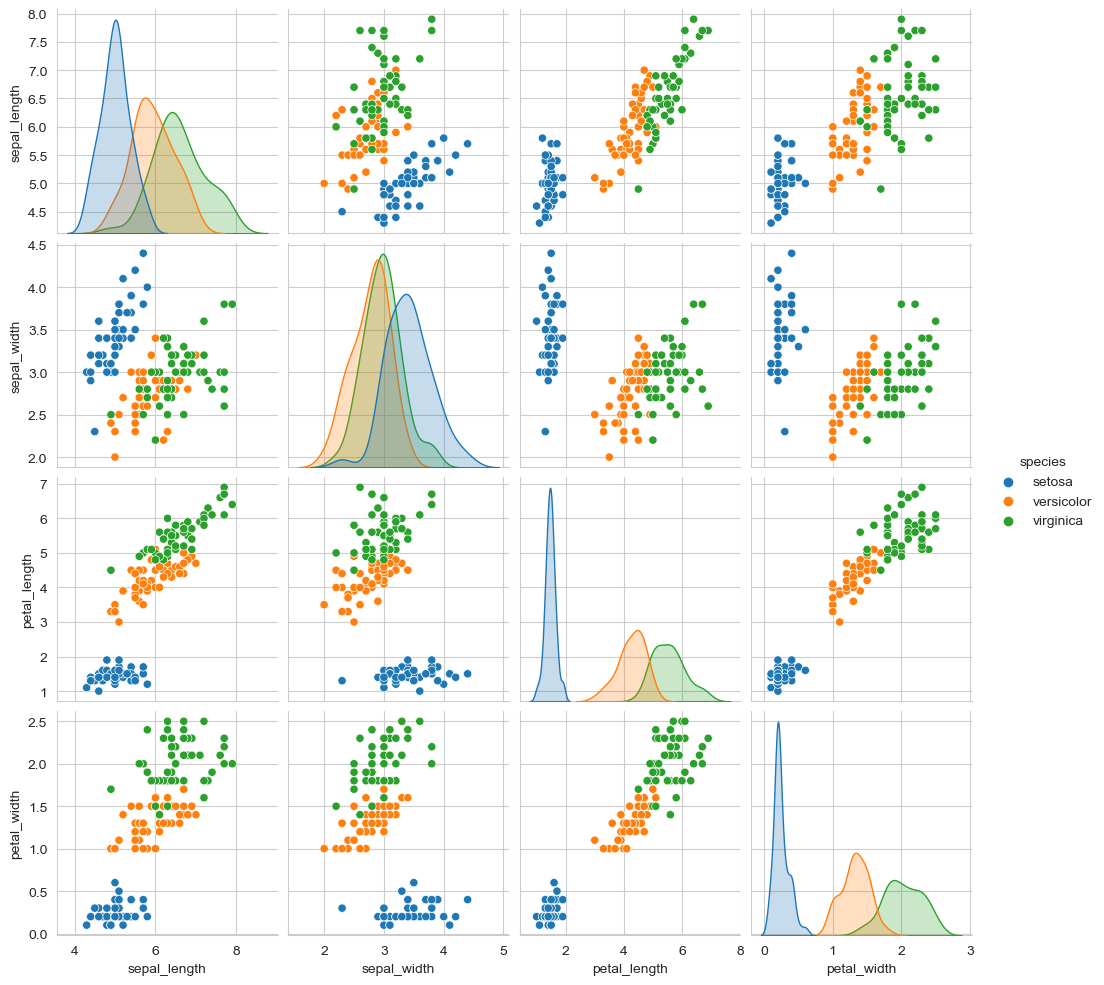

In [80]:
sns.set_style("whitegrid")
sns.pairplot(df, hue='species')

<Axes: xlabel='species', ylabel='sepal_width'>

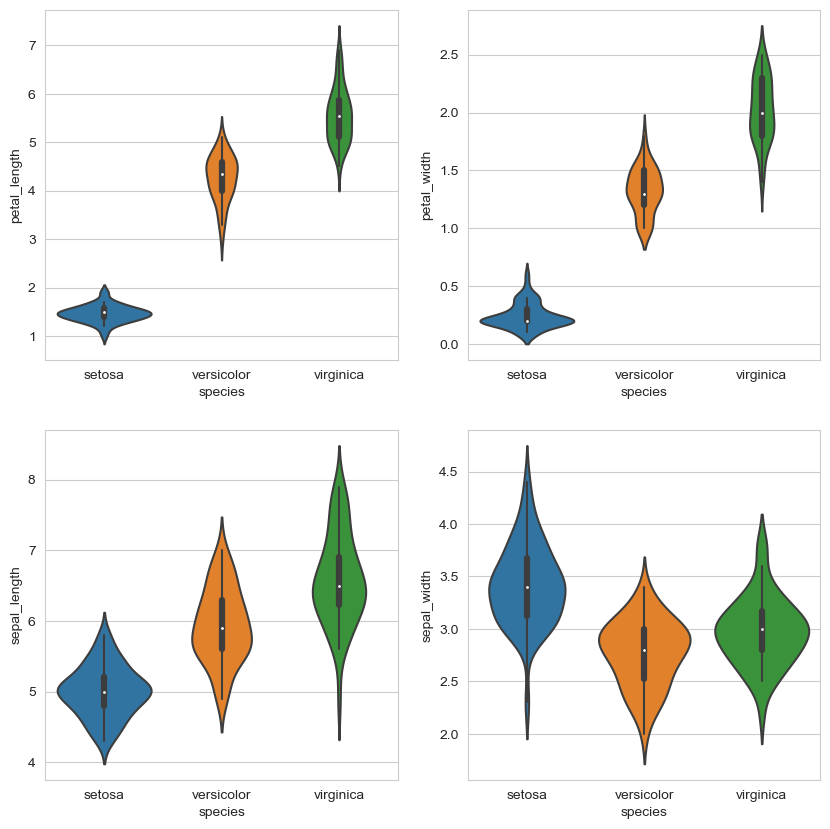

In [81]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.violinplot(x='species',y='petal_length',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='species',y='petal_width',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='species',y='sepal_length',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='species',y='sepal_width',data=df)

/var/folders/gc/dm7c6wn54kv89c8pyshdv6g80000gn/T/ipykernel_1306/3117944756.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='turbo' )  # Change 'cubehelix_r' to 'viridis' or any other colormap


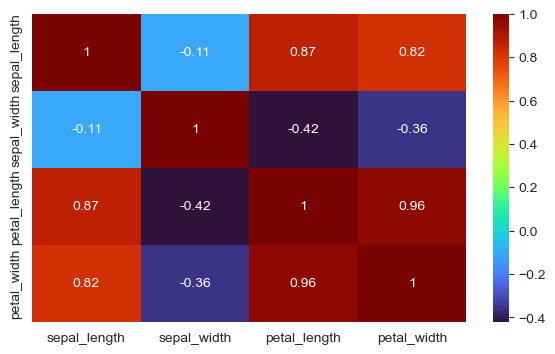

In [82]:
plt.figure(figsize=(7, 4))
sns.heatmap(df.corr(), annot=True, cmap='turbo' )  # Change 'cubehelix_r' to 'viridis' or any other colormap
plt.show()

# Clustering


In [83]:
from sklearn.model_selection import train_test_split
X = df.iloc[:, 0:4].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

/Users/mohamadrezasalehi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mohamadrezasalehi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mohamadrezasalehi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mohamadrezasalehi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: 

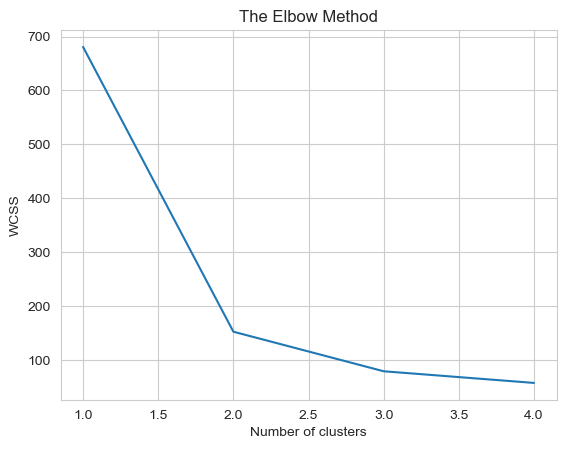

In [84]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 5):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 5), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The elbow point is where the rate of decrease in WCSS starts to slow down, indicating the optimal number of clusters. So, we can see three cohort in the optimal number.

In [85]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',n_init=10, random_state = 42)
y_kmeans = kmeans.fit_predict(X)

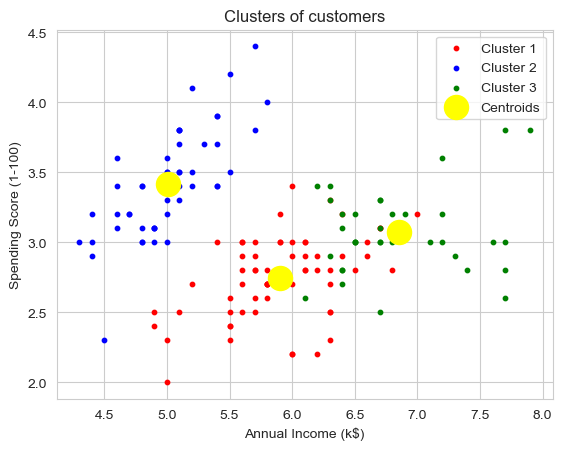

In [86]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [87]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X, y_kmeans)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.5525919445499754


In [88]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Fit the LabelEncoder to the unique values in the column and transform the column
df["target"] = le.fit_transform(df["species"])

# Now, the "column_name_encoded" column contains 0, 1, 2 based on the original names


In [89]:
df.tail(n = 50)

,sepal_length,sepal_width,petal_length,petal_width,species,target
100,6.3,3.3,6.0,2.5,virginica,2
101,5.8,2.7,5.1,1.9,virginica,2
102,7.1,3.0,5.9,2.1,virginica,2
103,6.3,2.9,5.6,1.8,virginica,2
104,6.5,3.0,5.8,2.2,virginica,2
105,7.6,3.0,6.6,2.1,virginica,2
106,4.9,2.5,4.5,1.7,virginica,2
107,7.3,2.9,6.3,1.8,virginica,2
108,6.7,2.5,5.8,1.8,virginica,2
109,7.2,3.6,6.1,2.5,virginica,2


In [90]:
df = df.drop('species', axis=1)

In [91]:
df

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [92]:
X = df.iloc[:, 0:4].values
y = df.iloc[:, -1].values

In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [107]:
y_pred = log_reg.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 2]
 [0 0]
 [2 2]
 [1 1]
 [0 0]
 [0 0]
 [1 2]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [2 2]
 [0 0]
 [2 2]
 [0 0]
 [0 0]
 [2 2]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [2 2]
 [2 2]
 [1 1]
 [1 1]]


In [108]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[11  0  0]
 [ 0  9  0]
 [ 0  2  8]]


0.9333333333333333

## PCA


<Axes: xlabel='PCA1', ylabel='PCA2'>

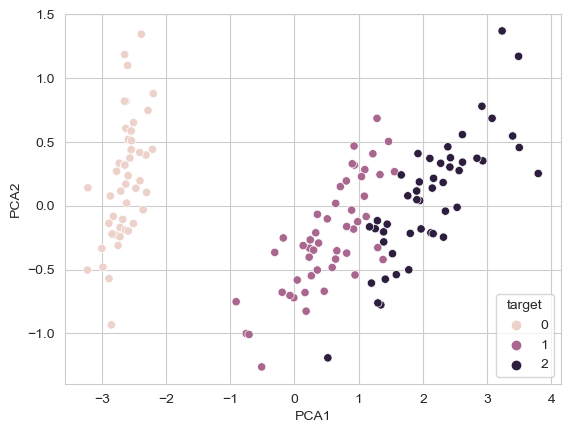

In [109]:
# Import the necessary libraries
from sklearn.decomposition import PCA
import seaborn as sns

# Create a PCA model with 2 components
model = PCA(n_components=2)

# Fit the PCA model to your data 'X'
model.fit(X)

# Transform the original data 'X' into a new dataset 'X_2D' with 2 principal components
X_2D = model.transform(X)

# Add two new columns 'PCA1' and 'PCA2' to the DataFrame 'df' to store the PCA results
df['PCA1'] = X_2D[:, 0]
df['PCA2'] = X_2D[:, 1]

# Create a scatter plot using Seaborn to visualize the PCA results
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue="target")

In [110]:
from sklearn.svm import SVC # "Support vector classifier" 
model = SVC(kernel='linear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[2 2]
 [0 0]
 [2 2]
 [1 1]
 [0 0]
 [0 0]
 [2 2]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [2 2]
 [0 0]
 [2 2]
 [0 0]
 [0 0]
 [2 2]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [2 2]
 [2 2]
 [1 1]
 [1 1]]


In [112]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[11  0  0]
 [ 0  9  0]
 [ 0  0 10]]


1.0

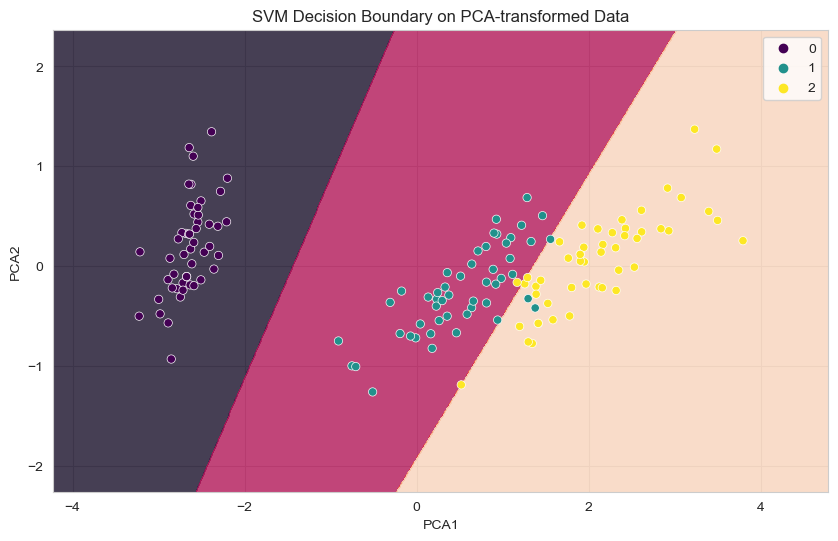

In [115]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Create an SVM classifier with a linear kernel (or choose the desired kernel)
svm_classifier = SVC(kernel='linear', C=1.0)
svm_classifier.fit(X_2D, df['target'])  # Fit the SVM to the PCA-transformed data

# Create a meshgrid to plot decision boundaries
x_min, x_max = X_2D[:, 0].min() - 1, X_2D[:, 0].max() + 1
y_min, y_max = X_2D[:, 1].min() - 1, X_2D[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Use the SVM classifier to make predictions on the meshgrid points
Z = svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create a scatter plot of the PCA-transformed data points
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8)
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue="target", palette="viridis")
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('SVM Decision Boundary on PCA-transformed Data')
plt.legend(loc='best')
plt.show()
